# Spam SMS Detection by DL(LSTM)

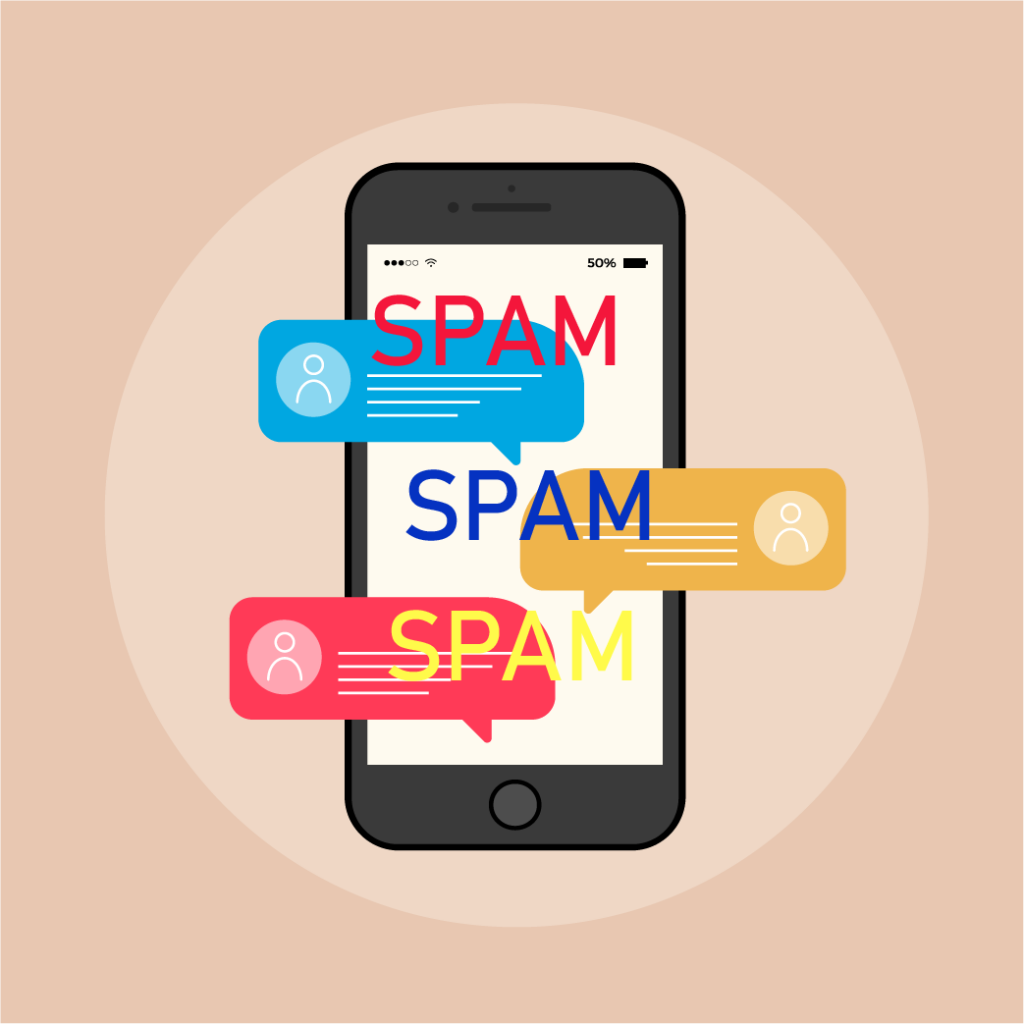

In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [70]:
# Importing PANDAS for Basic DATA Operations.
import pandas as pd

# Importing NUMPY for performing Numerical Operation & Multidimensional Array Implementation.
import numpy as np

# Importing SEABORN & MATPLOTLIB for PLOTTING or performing the visualization over the data.
import seaborn as sns
import matplotlib.pyplot as plt

# Importing PLOTLY for create a Dashboard visual & also Visualizing(express is a module in plotly).
import plotly.express as px

In [71]:
# Importing RE for to detect some pattern in data, UNICODEDATA to define character properties for all Unicode characters, 
# STRING to giving access to potentially useful constants & Classes.
import re, string, unicodedata

# Importing Punctuation it will give the all sets of punctuation.
from string import punctuation

# Collection is Specialized Container, COUNTER is a subclass of dict used for counting hashable objects.
from collections import Counter

# Importing the Ignore Warnings to Suppress Warnings.
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Importing LABELBINARIZER to covert continous feature values into dicrete values.
from sklearn.preprocessing import LabelBinarizer

# To Build a text report showing the main classification metrics,To Compute confusion matrix for evaluating the accuracy of a classification,Accuracy classification score.
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Importing TTSplit for SPLITTING the Data into Training&Test.
from sklearn.model_selection import train_test_split

# Importing LABELENCODER to normalize labels & to transform Non-numerical labels to numerical values.
from sklearn.preprocessing import LabelEncoder

In [73]:
# It's an ExtensionArray for storing sparse data.
from pandas.core.arrays.sparse.array import Sequence

# Importing TENSORFLOW to create Deep Learning models.
import tensorflow as tf

# Importing KERAS for defining and running our deep learning models.
import tensorflow
from tensorflow import keras

# Transforms each text in texts to a sequence of integers.
from keras.preprocessing import text, sequence

# Sequential is used to create models layer-by-layer.
from keras.models import Sequential

In [74]:
# LSTM to predict the long sequences of data like sentences, DENSE is used to create fully connected layers, DROPOUT is used to prevent the net from overfitting.
# EMBEDDING is used to convert each word into a fixed length vector, INPUT used to instantiate a Keras tensor.
from keras.layers import LSTM, Embedding, Dropout, Dense, Input

# Importing RLRP to reduce the learning rate by a factor of 2-10 once learning stagnates.
from keras.callbacks import ReduceLROnPlateau

# Importing the TOKENIZER to split the words & converts that to tokens.
from tensorflow.keras.preprocessing.text import Tokenizer

In [75]:
# Importing NLTK for working with NLP, it provides various text processing libraries with test datasets.
import nltk

# CORPUS is a Collection of text & audio dataset, STOPWORDS used to eliminate unimportant words, allow to focus on the important words(is,the,a,an).
from nltk.corpus import stopwords

# TEXTBLOB is imported for processing textual data(text analysis).
import textblob
from textblob import Word

# Files Presented in are downloaded here.
nltk.download('stopwords')
nltk.download('wordnet')                 # Comprises of huge english words dataset
nltk.download('omw-1.4')                 # Open Multilingual Wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [76]:
# Stemmers is a Interfaces used to remove morphological affixes from words,leaving only the word stem.
from nltk.stem.porter import PorterStemmer

# WORDCLOUD is used for visual representation of data
from wordcloud import WordCloud,STOPWORDS

# To doing things properly with the help of vocablary on the basis of morphological analysis of the words,(that provides semantic relationships between its words)
from nltk.stem import WordNetLemmatizer

# 
import nltk
nltk.download('punkt')

# WORD_TOKENIZE()is used to split a sentence into words, SENT_TOKENIZE is used to calculate a average of word between sentences
from nltk.tokenize import word_tokenize, sent_tokenize

# Process to markup(tag) the words in a text format for a particular PART_OF_SPEECH
from nltk import pos_tag
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importing the Dataset

In [78]:
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/Spam.csv', encoding="ISO-8859-1")

#Exploratory Data Analysis

In [79]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [80]:
df.shape

(5572, 5)

In [81]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [83]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
481,ham,"Yo carlos, a few friends are already asking me...",NaN,NaN,NaN
3890,ham,No problem. We will be spending a lot of quali...,NaN,NaN,NaN
402,ham,The hair cream has not been shipped.,NaN,NaN,NaN
3719,ham,"Yeah why not, is the gang all ready",NaN,NaN,NaN
4212,ham,I attended but nothing is there.,NaN,NaN,NaN


### Renaming the column name for building a model

In [84]:
df.rename(columns = {"v1":"target","v2":"text"}, inplace = True)

### Droping the unwanted column

In [85]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1, inplace = True)

In [86]:
df.head(10)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [87]:
df.tail(10)

,target,text
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [88]:
df.sample(10)

,target,text
4644,ham,Are you planning to come chennai?
1902,ham,My sister got placed in birla soft da:-)
2971,ham,Sary just need Tim in the bollox &it hurt him ...
823,spam,25p 4 alfie Moon's Children in need song on ur...
4087,ham,He needs to stop going to bed and make with th...
1052,ham,I got another job! The one at the hospital doi...
96,ham,Watching telugu movie..wat abt u?
1557,ham,Wat r u doing?
69,ham,I plane to give on this month end.
958,ham,My sort code is and acc no is . The bank is n...


In [89]:
df.shape

(5572, 2)

In [90]:
df.columns

Index(['target', 'text'], dtype='object')

### Finding a Duplicate values

In [91]:
df.duplicated().sum()

403

In [92]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

### Finding Null Values

In [93]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [94]:
df.isnull().sum().sum()

0

### Droping a duplicate values(Data Cleaning)

In [95]:
df.drop_duplicates()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


###  After droping the duplicated values

In [96]:
df.shape

(5572, 2)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Finding unique values

In [98]:
df.nunique()

target       2
text      5169
dtype: int64

In [99]:
df.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [100]:
df["target"].unique()

array(['ham', 'spam'], dtype=object)

In [101]:
df["target"].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

# **Data Visualization**

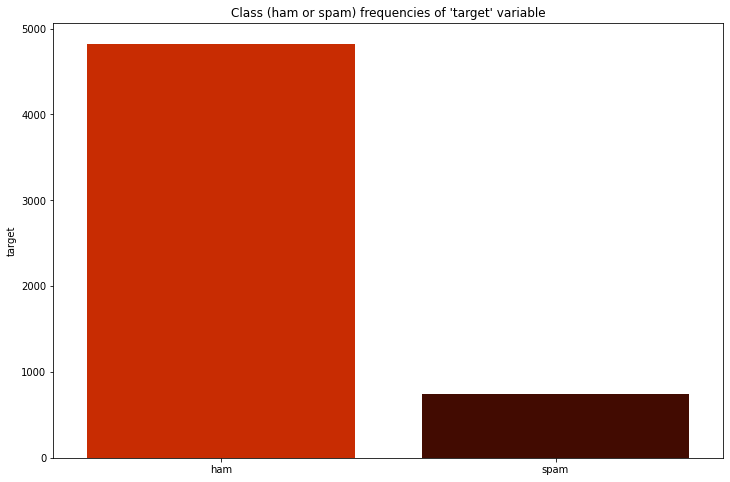

In [102]:
plt.figure(figsize = [12,8], clear = True, facecolor = 'white')
sns.barplot(x = df['target'].value_counts().index,
            y = df['target'].value_counts(), palette = ["#C82C02","#420B01"],
            saturation = 1).set(title = "Class (ham or spam) frequencies of 'target' variable")
plt.show()

### This shows that 'ham' is high valuecounts

In [103]:
fig = px.pie(data_frame = df, names = "target", hole = 0.3, title = "Counts in 'target' variables",
             width = 1000, height = 600, color_discrete_sequence= px.colors.sequential.Sunset_r)
fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.5, color = "#510F01")))
fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)
fig.show()

### This shows the same as barplot in percentage of details in piechart

In [104]:
# How many characters are in the text
df["ch_no"] = df["text"].apply(len)

# How many words are in the text
df["wd_no"] = df.apply(lambda row: nltk.word_tokenize(row["text"]),axis = 1).apply(len)

# How many sentences are there in the data
df["sn_no"] = df.apply(lambda row: nltk.sent_tokenize(row["text"]),axis = 1).apply(len)

In [105]:
df.describe().T.style.background_gradient(cmap = "Purples_r")

,count,mean,std,min,25%,50%,75%,max
ch_no,5572.000000,80.118808,59.690841,2.000000,36.000000,61.000000,121.000000,910.000000
wd_no,5572.000000,18.695621,13.742587,1.000000,9.000000,15.000000,27.000000,220.000000
sn_no,5572.000000,1.970747,1.417778,1.000000,1.000000,1.000000,2.000000,28.000000


In [106]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,5562,5563,5564,5565,5566,5567,5568,5569,5570,5571
target,ham,ham,spam,ham,ham,spam,ham,ham,spam,spam,...,ham,ham,ham,ham,spam,spam,ham,ham,ham,ham
text,"Go until jurong point, crazy.. Available only ...",Ok lar... Joking wif u oni...,Free entry in 2 a wkly comp to win FA Cup fina...,U dun say so early hor... U c already then say...,"Nah I don't think he goes to usf, he lives aro...",FreeMsg Hey there darling it's been 3 week's n...,Even my brother is not like to speak with me. ...,As per your request 'Melle Melle (Oru Minnamin...,WINNER!! As a valued network customer you have...,Had your mobile 11 months or more? U R entitle...,...,Ok lor... Sony ericsson salesman... I ask shuh...,Ard 6 like dat lor.,Why don't you wait 'til at least wednesday to ...,Huh y lei...,REMINDER FROM O2: To get 2.50 pounds free call...,This is the 2nd time we have tried 2 contact u...,Will Ì_ b going to esplanade fr home?,"Pity, * was in mood for that. So...any other s...",The guy did some bitching but I acted like i'd...,Rofl. Its true to its name
ch_no,111,29,155,49,61,148,77,160,158,154,...,96,19,67,12,147,161,37,57,125,26
wd_no,24,8,37,13,15,39,18,31,32,31,...,21,6,16,4,30,35,9,15,27,7
sn_no,2,2,2,1,1,4,2,2,5,3,...,2,1,1,1,1,4,1,2,1,2


In [107]:
df

,target,text,ch_no,wd_no,sn_no
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


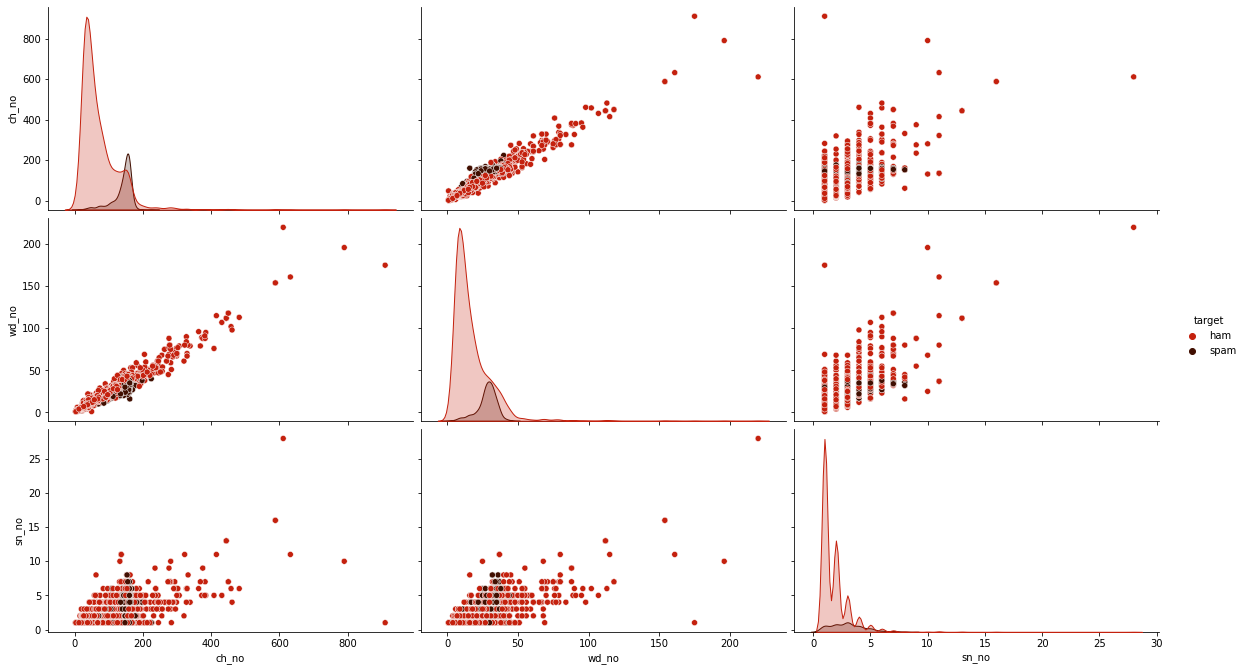

In [108]:
fig = sns.pairplot(data = df, hue = "target", palette = ["#C4210E","#410F01"], height = 3.15, aspect =1.75)
plt.show(fig);

### Ploted the paiplot for ham & spam for ch_no, wd_no, sn_no.

### Converting the words to lowercase and joining the spaces

In [109]:
df["text"] = df["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Finding the Punctuation mark replace them with a emoty spaces

In [110]:
df["text"] = df["text"].str.replace('[^\w\s]','')

### Finding the numeric values and replace with them a space, Basically /d means integer

In [111]:
df["text"] = df["text"].str.replace('\d','')

### Assigning Stopwords & Punctuations,Updating puntutions with the stopwords spliting all the words and if it is not a stopword take them to model

In [112]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)
df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

### Lemmatizing to select the root words

In [113]:
df["text"] = df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### Removing the hyper link and replace it with the spaces

In [114]:
df["text"] = df["text"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))

In [115]:
df["text"] = df["text"].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 3]))

In [116]:
df.head(10)

,target,text,ch_no,wd_no,sn_no
0,ham,jurong point crazy available bugis great world...,111,24,2
1,ham,joking,29,8,2
2,spam,free entry wkly comp final tkts text receive e...,155,37,2
3,ham,early already,49,13,1
4,ham,dont think life around though,61,15,1
5,spam,freemsg darling week word back like still chgs...,148,39,4
6,ham,even brother like speak treat like patent,77,18,2
7,ham,request melle melle minnaminunginte nurungu ve...,160,31,2
8,spam,winner valued network customer selected receiv...,158,32,5
9,spam,mobile month entitled update latest colour mob...,154,31,3


In [117]:
df.tail(10)

,target,text,ch_no,wd_no,sn_no
5562,ham,sony ericsson salesman shuhui quite considering,96,21,2
5563,ham,like,19,6,1
5564,ham,dont wait least wednesday,67,16,1
5565,ham,,12,4,1
5566,spam,reminder pound free call credit detail great o...,147,30,1
5567,spam,time tried contact pound prize claim easy call...,161,35,4
5568,ham,going esplanade home,37,9,1
5569,ham,pity mood soany suggestion,57,15,2
5570,ham,bitching acted like interested buying somethin...,125,27,1
5571,ham,rofl true name,26,7,2


In [118]:
df.sample(10)

,target,text,ch_no,wd_no,sn_no
858,ham,spoon okay,23,6,1
1480,ham,always saying welp,33,7,1
1706,ham,woman please tell like dislike,75,19,3
3735,ham,hows street library walk,49,11,1
3704,ham,good making money,47,12,3
550,ham,imagine finally sink bath pace maybe even left...,281,59,3
289,ham,dearshall mail tonitebusy streetshall update t...,152,26,1
4374,spam,tonexs subscription renewed charged choose pol...,146,27,3
1220,spam,nokia tone every week tone free txtin tell fri...,143,36,7
1007,ham,dont quite know still cant hold anyone pick bo...,132,36,3


In [119]:
df.shape

(5572, 5)

### By creating a for loop spliting the words and collect in it a corpus list

In [120]:
corpus = []
for i in df.text:
    for j in i.split():
        corpus.append(j.strip())

###  Counter is an dictionary which is unordered collection of data it comprises of two things that is frequency of the word occurance and the word.

In [121]:
counter = Counter(corpus)
common_words = counter.most_common(15)
dict(common_words)

{'call': 602,
 'dont': 279,
 'free': 278,
 'ltgt': 276,
 'know': 267,
 'come': 247,
 'like': 245,
 'good': 235,
 'time': 233,
 'text': 215,
 'want': 213,
 'love': 203,
 'send': 190,
 'need': 182,
 'going': 171}

### Creating a word cloud for the texts present in dataset

<function matplotlib.pyplot.show(*args, **kw)>

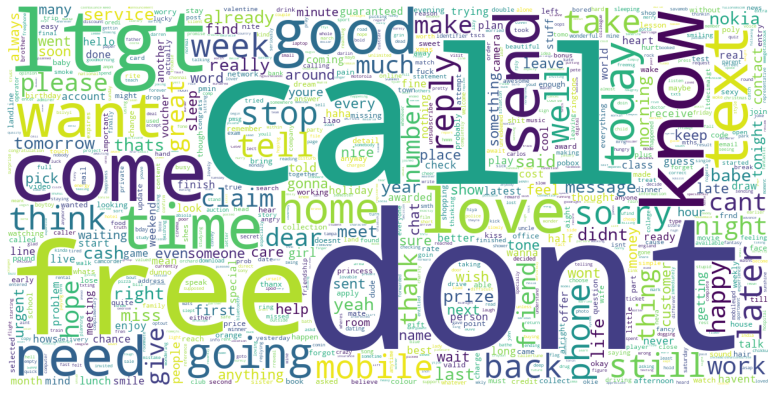

In [122]:
text = " ".join(i for i in df.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1) #Collocation means there is any relationship between the word

wc.generate(text)

plt.figure(figsize = [15,7])
plt.imshow(wc)
plt.axis("off")
plt.show

### This graph shows the frequency of words present in the dataset according to the size how much word is appeared

Text(0.5, 1.0, 'Distribution of average word length in texts where target is spam')

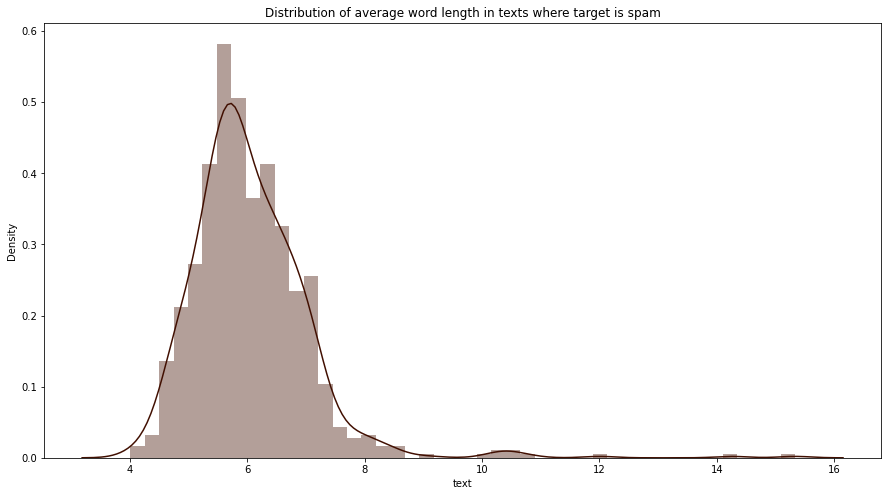

In [123]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = df[df["target"] == "spam"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is spam")

### This distribution plot shows that the spam words presented in the text column

Text(0.5, 1.0, 'Distribution of average word length in texts where target is ham')

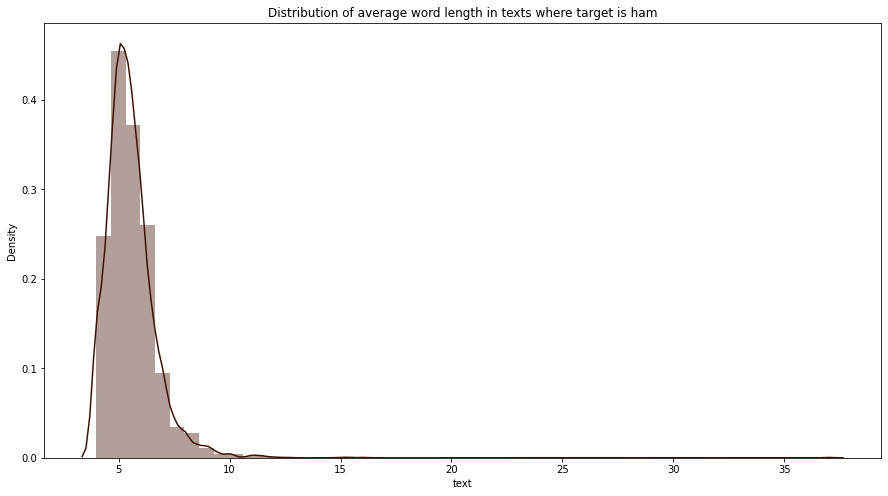

In [124]:
fig,ax = plt.subplots(figsize = (15,8))
text_words = df[df["target"] == "ham"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x : np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is ham")

### The distribution plot about that the non spam letters presented in the text column 

# Encoding

In [125]:
lb = LabelEncoder()
df["target"] = lb.fit_transform(df["target"])

### By using label encoder to assign o & 1 to the target column for spam an ham

## Spliting the  data of feature and label

In [126]:
x = df["text"]
y = df["target"]

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.20, shuffle = True, random_state = 11)
# Training size is 80% , Shuffle true represents that to pick a sample balanced & random state 11 represent that it need to pick a 1 - Sample out of Every 11 samples 

In [127]:
print("The shape of 'train_x' is {} and the shape of 'test_x' is {}".format(train_x.shape[0], test_x.shape[0]))

The shape of 'train_x' is 4457 and the shape of 'test_x' is 1115


In [128]:
# To transform a list of sequences to the 2D numpy array it performs in same length only
from keras_preprocessing.sequence import pad_sequences

In [129]:
tokenizer = Tokenizer(num_words = None)

# What are all the words present in the train will convert them into tokens, It applies a internal vocabulary based on the text.
tokenizer.fit_on_texts(train_x)

# Text to sequences will update the internal vocabulary of the data on the basis of sequences
tokenized_train = tokenizer.texts_to_sequences(train_x)
tokenized_test = tokenizer.texts_to_sequences(test_x)

train_x = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen = None)
test_x = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen = None)

### It is another data that is glove it is a huge set of words,glove is basically a unsupervised learning algorithm

In [132]:
GLOVE_EMBEDDING = "/content/gdrive/MyDrive/glove.twitter.27B.100d.txt"

### it is used to perform vector representation for the words,it is a type of word embedding that can encode the co-occurance probability ratio between the two words of vector differences

In [133]:
# Created a method:
def get_coefs(Word, *arr):
    return Word, np.asarray(arr, dtype = "float32")
embeddings_index = dict(get_coefs(*g.rstrip().rsplit(" ")) for g in open(GLOVE_EMBEDDING, encoding="utf8"))

In [134]:
# stack function is used to join a sequence of arrays along with the new axis after that finding a mean and standard deviation
embeddings = np.stack(embeddings_index.values())
embedding_mean, embedding_std = embeddings.mean(), embeddings.std()
embedding_size = embeddings.shape[1]

# Check what are all the word present in the embeddings
word_index = tokenizer.word_index
nb_words = min(6012, len(word_index))+1

# Created a normal distribution by e_matrix
embedding_matrix = embedding_matrix = np.random.normal(embedding_mean, embedding_std, (nb_words, embedding_size))
for word, i in word_index.items():
    if i >= 6012:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Vectorizing the word incase if it is not done then embedding matrix is equal to embedding vectors

### We need to check the accuracy

In [144]:
lr_reduce = ReduceLROnPlateau(monitor="val_accuracy",patience = 2, factor = 0.5, min_lr = 0.0001)

In [145]:
# Created a sequence model
model = Sequential()

# Adding embedding
model.add(Embedding(6013, output_dim = 100, weights = [embedding_matrix],  trainable = False))

# lstm is a special kind recurrent neural network, it is capable of learning long term independences
model.add(LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3, dropout = 0.5))

model.add(LSTM(units = 64, recurrent_dropout = 0.3, dropout = 0.5))

model.add(Dense(units = 32, activation = "relu"))

model.add(Dense(1, activation="softmax"))

# predictions = Dense(len(),name='output', activation="softmax")(x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01),loss = "binary_crossentropy", metrics = ["accuracy"])

In [146]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         601300    
                                                                 
 lstm_8 (LSTM)               (None, None, 128)         117248    
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 770,069
Trainable params: 168,769
Non-trainable params: 601,300
_________________________________________________________________


In [152]:
# Fitting the data
history = model.fit(train_x, 
                    train_y, 
                    batch_size = 64, 
                    validation_data = (test_x, test_y), 
                    epochs = 20, 
                    callbacks = [lr_reduce])

Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
print("Model accuracy on the train set: ", model.evaluate(train_x, train_y)[1])
print("Model accuracy on the test set: ", model.evaluate(test_x, test_y)[1])

In [ ]:
epochs = [i for i in range(20)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy")
ax[0].set_title("Train and test accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss")
ax[1].set_title("Train and test loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
prediction = model.predict(test_x)
classes_pred = np.argmax(prediction, axis = 1)

print(classification_report(test_y, classes_pred))

In [ ]:
conf_mat = confusion_matrix(test_y, classes_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True)
plt.show()